# 미니 프로젝트 2_ARIMA, ARCH

## 프로젝트 구성
각 프로젝트는 데이터셋을 불러와 모델을 학습시켜 평가돌리는 것까지 전체 프로세스를 다루고 있습니다.      
2가지 데이터셋에 대한 두 개의 프로젝트로 구성, 노드의 순서와 배운 내용에 기초하여 진행하였습니다. 
1. ARIMA    사용한 데이터셋: air passengers      
2. ARCH     사용한 데이터셋:        s&p 500       

## 목차
1. ARIMA를 통해 시계열 예측해 보기(AirPassengers 데이터셋 활용)
2. ARCH 
3. 회고
4. Reference


## 글씨 색 표시
### <span style = "color:orange;">궁금해서 찾아본 부분, 새로 알게 된 것</span>    
### <span style = "color:red;">출력 결과 중 특이사항 표시</span>

## 1. ARIMA를 통해 시계열 예측해 보기
AirPassengers 데이터로 이후 패턴 예측

목차
1. 데이터 연결하기
2. 필요한 라이브러리와 ARIMA 모델 불러오기
3. 분산을 일정하게 만들기
4. 차분을 통해 분석하기
5. 데이터 분리하기(train data, test data)
AutoArIMA 적용 및 결과 확인
6. 예측 성능 시각화

### Step 1. 데이터 연결하기
- 데이터가 있는 폴더 연결

In [8]:
# 데이터가 저장된 폴더 연결
!mkdir -p aiffel/time_series_basic 

### <span style = "color:red;">아래 두 부분에서 에러가 남</span>  
저장경로에서 에러가 난 것 같다

클라우드 쥬피터 상에는 AirPassengers.csv가 들어가 있고, 아래에서 ap도 출력이 되기에 우선 넘어감

In [29]:
# !cp data/AirPassengers.csv aiffel/time_series_basic/
!cp data/AirPassengers.csv aiffel/

cp: cannot stat 'data/AirPassengers.csv': No such file or directory


In [30]:
!cp data/AirPassengers.csv

cp: missing destination file operand after 'data/AirPassengers.csv'
Try 'cp --help' for more information.


### Step 2. 필요한 라이브러리와 ARIMA 모델 불러오기

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [2]:
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')

ap.drop('Month', axis = 1, inplace = True)

In [3]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')

### <span style = "color:red;">여기에서 왜 aiffel/aiffel인지 모르겠다... </span>       
그래서 aiffel을 빼고 해 봄

In [14]:
ap = pd.read_csv('/aiffel/time_series_basic/AirPassengers.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/time_series_basic/AirPassengers.csv'

에러가 난다. 여기 상위 루트가 aiffel? 유저명이 aiffel?    
유저명 = home...     
home = 루트?


-> 추후 reference 터미널 노드를 공부하고 난 뒤,

### <span style = "color:red;">aiffel은 root 상위 루트...? 인 듯!</span>   

계속 진행하기 위해 ap를 다시 소환

### Step 3. 분산을 일정하게 만들기
- 로그변환(Log Transformation)을 통해 분산을 일정하게 조절
- 분산이 일정하게 적용되었는지 시각화한 후 확인

In [20]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


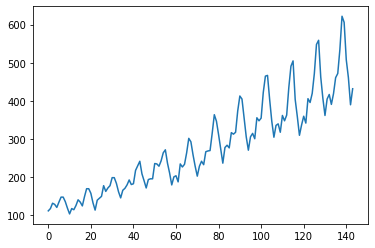

In [21]:
plt.plot(ap)
plt.show()

In [22]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


[]

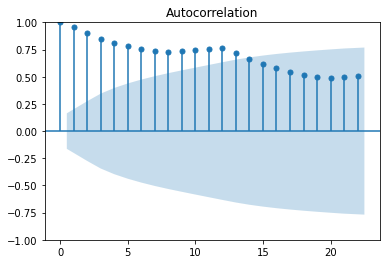

In [7]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

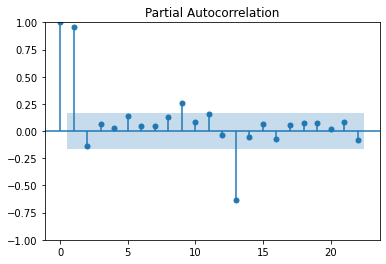

In [11]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot()

### <span style = "color:red;">이 그래프를 사용하는 이유!</span> 

#### ACF Plot
= AutoCorrelation Function Plot
자기 상관 함수 그래프

자기 상관 함수는 시간에 따른 상관 정도를 나타내기 위해 사용하는 통계량

-> 그래서 시간에 따른 상관 관계가 높게 나타나는 부분이 유의미하다고 하는 것?

파란색으로 나타나는 부분은 임계값

자기 상관
: 시계열 데이터에서 일정 간격이 있는 값들 사이의 상관관계를 의미
    
출처: 시계열 3-3 노드

용어정리를 가지고 오면


자기상관함수
x축은 시차(lag), y축은 자기상관을 나타낸다     
시차가 0일 때, 자기 상관은 항상 1의 값을 가진다.     
파란색 점선은(위 도표에서는 영역 표시로 나온 것 같지만..) 임계값으로 95% 신뢰구간으로 추정되는 표준편차를 의미한다     
파란 임계값 안에 들어가는 선들은 통계적으로 중요하지 않다      

#### PACF Plot
= Partial AutoCorrelation Function Plot
편자기상관 함수 그래프

편자기상관함수는 두 시점 사이의 상관관계를 보려고 하는 경우 시점의 영향을 주는 요소들을 제외한 상관관계를 볼 때 사용한다    
두 시점 사이의 전체 상관관계에서 그 사이 다른 시점의 조건부 상관관계를 뺀 것      
ACF에서 불필요한 중복 관계가 제거된 것을 볼 수 있다

둘의 의미적 차이는      
acf는 두 시점 간의 상관관계를 계산할 때 두 시점 사이의 모든 lag에 대한 정보가 들어가지만      
pacf는 오로지 두 시점만의 상관관계만을 계산(다른 lag는 조건부 상관관계로 제거)

### Step 4.차분을 통해 분석하기
ACF, PACF Plot과 차분을 활용하여 분석

### <span style = "color:red;">의문</span> 
왜 분산을 일정하게 만들고 두 개의 그래프를 그려보고      
또 차분을 적용한 다음 두 개의 그래프를 그리지?

In [8]:
ap_diff = ap_transformed.diff() # 이건 위에서 분산을 고르게 만들고 난 다음의 ap_transformed
ap_diff = ap_diff.dropna()

[]

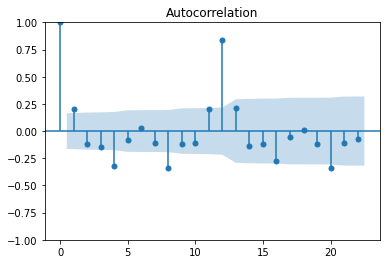

In [9]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_diff) 
plt.plot()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

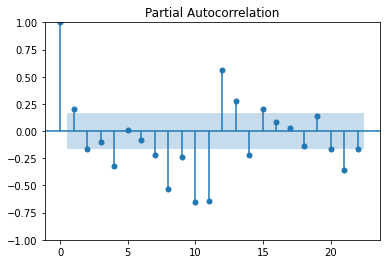

In [10]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(ap_diff) 
plt.plot()

### <span style = "color:red;">내 생각에는</span> 
그래프를 2개 그려보는 이유는 분산을 적용해서 유의미한 값이 있는지 먼저 알아보고       
별로 차이점이 보이지 않으니      
분산에 차분을 적용해보고 그래프를 그려보는 것 같다

n=12 즈음에서 유의미한 상관관계가 나타난다. 이는 계절성 성분으로 추측됨       
arima를 적용할 때에 계절성 요인도 고려해야 한다

In [11]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


### Step 5. 데이터 분리하기(train data, test data)

In [13]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

### Step 6. Auto ARIMA 적용 결과 확인
AutoARIMA 내부 인자 의미
- seasonal : False인 경우 non-seasonal model로 제한합니다.
- suppress_warnings : ARIMA를 실행하면 생기는 에러문구를 나오지 않도록 해줍니다.
- trace : True일 때 오류(error)가 발생하면 일부 내용을 출력합니다.
- max_D : seasonal의 최대 값을 설정할 수 있습니다.

In [14]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12, D = 12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-196.569, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 4.013 seconds


### <span style = "color:red;">ARIMA(0,1,2) 모델이 적절하다고 나옴</span> 

In [15]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 
preds, conf_int

(array([6.18010083, 6.14616332, 6.15817888, 6.17019443, 6.18220998,
        6.19422554, 6.20624109, 6.21825665, 6.2302722 , 6.24228775,
        6.25430331, 6.26631886, 6.27833442, 6.29034997, 6.30236553,
        6.31438108, 6.32639663, 6.33841219, 6.35042774, 6.3624433 ,
        6.37445885, 6.3864744 , 6.39848996, 6.41050551, 6.42252107,
        6.43453662, 6.44655218, 6.45856773, 6.47058328]),
 array([[5.98736259, 6.37283907],
        [5.85107277, 6.44125387],
        [5.82729445, 6.48906331],
        [5.807027  , 6.53336186],
        [5.78940386, 6.57501611],
        [5.77386531, 6.61458577],
        [5.760025  , 6.65245718],
        [5.74760298, 6.68891031],
        [5.73638867, 6.72415573],
        [5.72621895, 6.75835656],
        [5.71696441, 6.7916422 ],
        [5.70852037, 6.82411736],
        [5.70080067, 6.85586817],
        [5.69373342, 6.88696652],
        [5.68725791, 6.91747314],
        [5.68132227, 6.94743989],
        [5.67588182, 6.97691145],
        [5.6708977 , 7.0

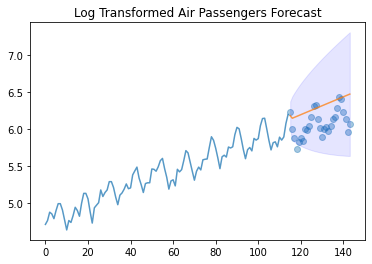

In [16]:
# 예측 성능을 시각화
# 0. train과 test data를 축(axis)으로 만듦
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냄
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성 # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화

## 2. ARCH
사용한 데이터셋: s&p 500

### Step 1. 데이터 및 라이브러리 불러오기

In [28]:
!pip install statsmodels
import datetime as dt 
import arch.data.sp500 

ModuleNotFoundError: No module named 'arch'

### <span style = "color:red;">No module named 'arch'</span> 

ARCH에 대해서 찾아보고 !pip install statsmodels 를 넣어봤는데도 에러가 난다;

### Step 2. 데이터 가공 및 시각화

In [ ]:
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한
plt.show()

### Step 3. ARCH 모델 적용

In [ ]:
from arch import arch_model
am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

### Step 4. 지표를 통한 결과 확인

In [ ]:
print(res.summary())

노드에서는      
아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며,     
p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출한다고 되어있다.   


하지만, 실습해보려고 하니 데이터 불러오는 거에서 에러가 나서...   
추가 공부가 필요할 것 같다.

### Step 5. 시각화를 통한 결과값 확인

In [ ]:
res.plot()

## 3. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    1. ARIMA 모델과 ARCH 모델에 대해 프로젝트를 수행할 만큼 충분히 공부하지 못해 프로젝트 진행에 어려움이 있었습니다.
    2. ARCH 모델을 불러오는 것에서 생긴 에러를 해결하지 못했습니다.


- **해결을 위해 시도한 방법**  
    ARIMA 모델에 대해 이해하기 위해 조원들과 이야기해보고, 추가 자료들을 찾아보았습니다.
     

- **문제해결에 성공한 이유 또는 실패한 이유**  
    공부가 부족했습니다.

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**

음.. 거의 없습니다.

- **아직 모호한 점**

대부분의 부분에서 개념이 많이 모호합니다.

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

이번 프로젝트는 시간이 충분치 못했습니다.     
지난번 시계열 미니 프로젝트1은 최대한 많이 이해하려 시간도 많이 투자해 개인적으로도 소득이 있었는데,    
이번에는 그렇지 못해 많이 아쉽습니다.    
 

시계열 노드를 복습하며 다시 공부하겠습니다. 

## 참고한 레퍼런스

<span style = "color:gray;">LMS 시계열 노드</span>     